<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주차수요 예측 AI 경진대회

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [47]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [213]:
train=pd.read_csv("train.csv")
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

왜 임대료하고 임대보증금이 objest 형인지 알수없는 부분... 왜? 내가 형식을 바꿔줘야 겠다고 생각함

In [215]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [216]:
train.describe()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


In [217]:
test=pd.read_csv("test.csv")
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [55]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

# EDA

In [56]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [58]:
train.head(2)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0


In [218]:
train['임대보증금']=train['임대보증금'].astype(float)
test['임대보증금']=test['임대보증금'].astype(float)

train['임대료']=train['임대료'].astype(float)
test['임대료']=test['임대료'].astype(float)

ValueError: ignored

엥.. 머선일.. -이게 왜 있는데
'-' 이거 뭔데. 뭔가 숨어있나보다

In [219]:
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)
train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   float64
 10  임대료                           2362 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

good

In [62]:
train['단지코드'].value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C2490     2
C2188     1
C2340     1
C2520     1
C2437     1
Name: 단지코드, Length: 423, dtype: int64

주어진 단지가 423개는 있나봄. 나중에 얘네끼리 묶어주던가 해야겠다. 어차피 같은 단지니까

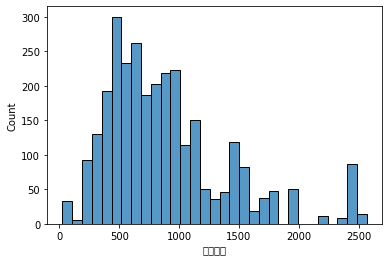

In [79]:


sns.histplot(data=train,x='총세대수')

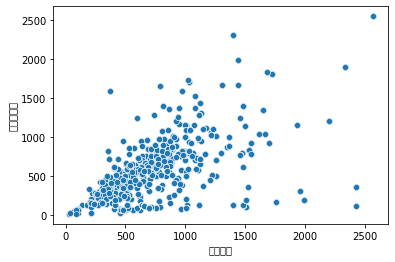

In [64]:
sns.scatterplot(data=train,x='총세대수',y="등록차량수")

아니 왜 한글 안되는데.. 뭘 더 해줘야하는데
원하는대로 해줬자나!~~~~~~~~~~~~~~~~`
여튼 500에서 1000사이가 가장 많다. 

In [65]:
train['임대건물구분'].value_counts()

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

In [66]:
train['지역'].value_counts()

경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

In [67]:
train['공급유형'].value_counts()

국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

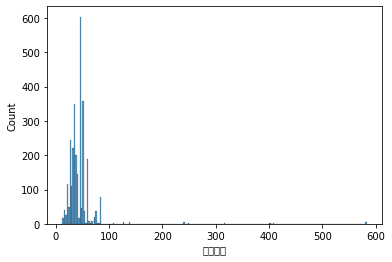

In [68]:
sns.histplot(data=train,x='전용면적')

굉장히 꼬리가 긴 데이터..이건 나중에 StandardScaler로 처리해버리던지 log로 바꿔버리던지 해야지 

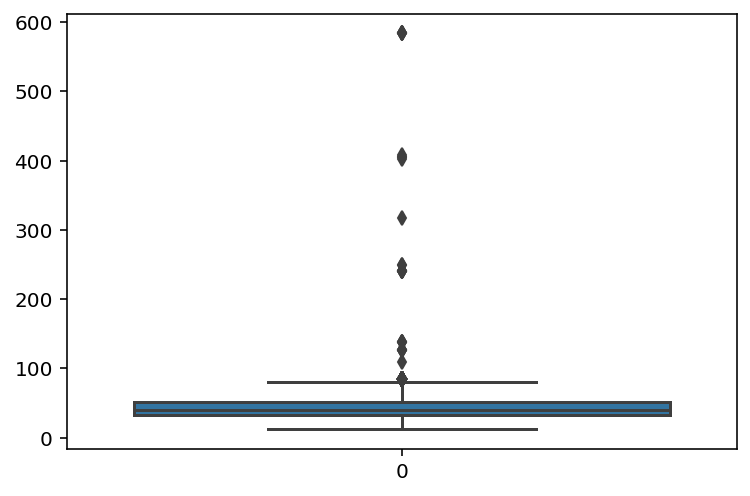

In [93]:
sns.boxplot(data=train['전용면적'])

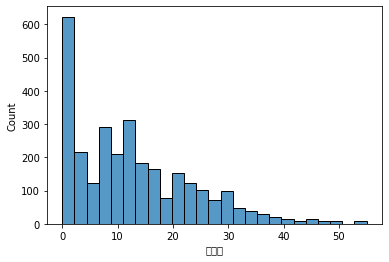

In [69]:
sns.histplot(data=train,x='공가수')

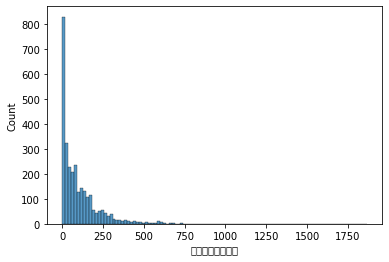

In [70]:
sns.histplot(data=train,x='전용면적별세대수')

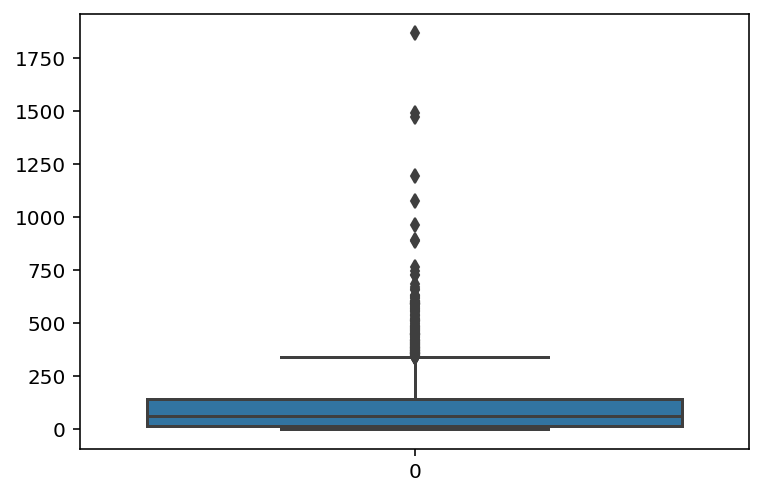

In [94]:
sns.boxplot(data=train['전용면적별세대수'])

In [71]:
train['자격유형'].value_counts()

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [168]:
test['자격유형'].value_counts()

A    572
D    180
H     92
J     84
C     34
K     16
L     12
N     10
E     10
I      7
M      2
G      1
Name: 자격유형, dtype: int64

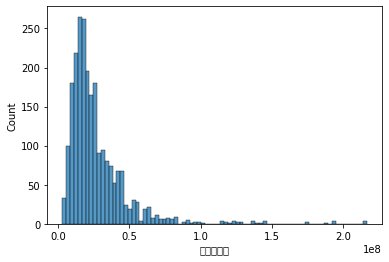

In [72]:
sns.histplot(data=train,x='임대보증금')

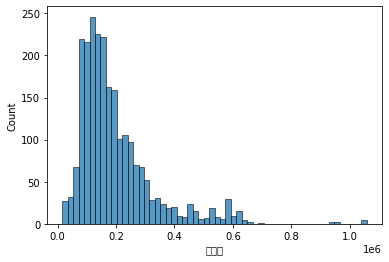

In [73]:
sns.histplot(data=train,x='임대료')

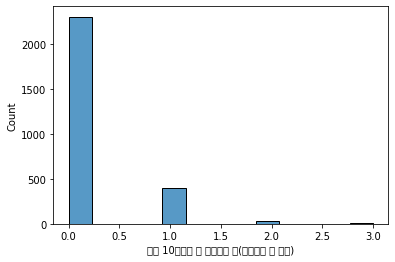

In [74]:
sns.histplot(data=train,x='도보 10분거리 내 지하철역 수(환승노선 수 반영)')

컬럼명이 너무 길고 빡쳐서 안되겠다. 바꿔주기로함

In [220]:
train=train.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철'})
train=train.rename(columns={'도보 10분거리 내 버스정류장 수':'버스'})
test=test.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철'})
test=test.rename(columns={'도보 10분거리 내 버스정류장 수':'버스'})

In [125]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스', '단지내주차면수', '등록차량수'],
      dtype='object')

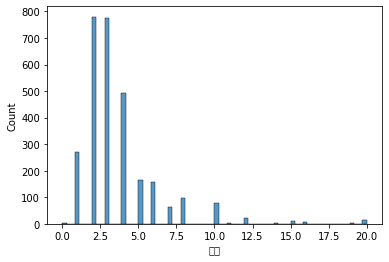

In [80]:
sns.histplot(data=train,x='버스')

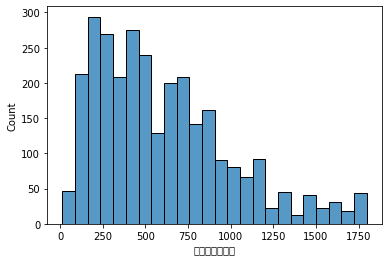

In [81]:
sns.histplot(data=train,x='단지내주차면수')

In [87]:
corr=train.corr()
corr

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
총세대수,1.000000,0.042271,0.098205,0.068192,0.075493,0.099606,0.213843,-0.001446,0.501488,0.316703
전용면적,0.042271,1.000000,-0.035479,-0.089201,0.490950,0.740591,-0.013111,-0.007866,0.071260,0.115453
전용면적별세대수,0.098205,-0.035479,1.000000,0.166472,-0.099252,-0.057759,-0.056680,0.047112,0.281989,0.247085
공가수,0.068192,-0.089201,0.166472,1.000000,0.030728,-0.194322,-0.093334,0.043285,0.289819,0.118121
임대보증금,0.075493,0.490950,-0.099252,0.030728,1.000000,0.557144,0.027113,0.110757,0.270697,0.311469
임대료,0.099606,0.740591,-0.057759,-0.194322,0.557144,1.000000,0.071571,0.044654,0.279785,0.416536
지하철,0.213843,-0.013111,-0.056680,-0.093334,0.027113,0.071571,1.000000,0.098380,-0.055544,-0.108592
버스,-0.001446,-0.007866,0.047112,0.043285,0.110757,0.044654,0.098380,1.000000,0.070696,0.103752
단지내주차면수,0.501488,0.071260,0.281989,0.289819,0.270697,0.279785,-0.055544,0.070696,1.000000,0.859216
등록차량수,0.316703,0.115453,0.247085,0.118121,0.311469,0.416536,-0.108592,0.103752,0.859216,1.000000


히트맵그렸더니 한글이 안보여서 어쩔수 없이 시각화는 안하고 이렇게 표로 확인 함. 등록 차량 수랑 관계가 있어보이는 피처값은 총세대수, 임대료, 임대보증금, 단지내주차면수. 단지내주차면수가 가장 상관성이 크다.

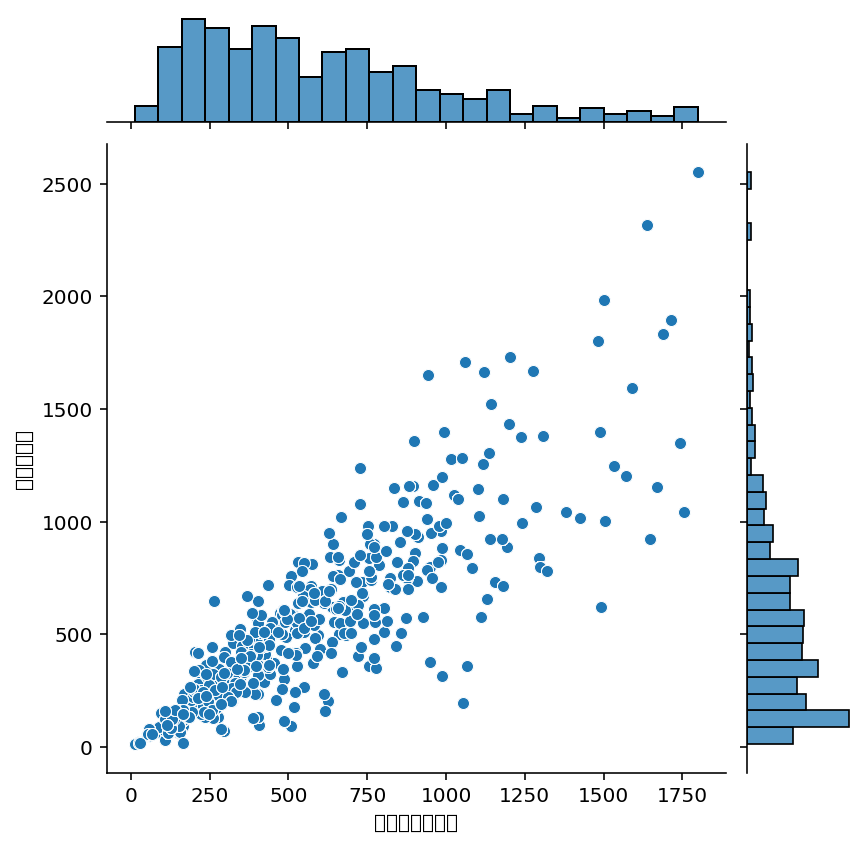

In [90]:
sns.jointplot(data=train,x="단지내주차면수",y="등록차량수")

# 전처리

데이터를 어떻게 문석할까 생각을 해봤는데 지역끼리 묶을지, 단지끼리 묶을지 고민을 많이 했다. 아무래도 새로운 데이터를 만들어서 분석에 이용해야할 것 같기도..?

In [95]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스', '단지내주차면수', '등록차량수'],
      dtype='object')

In [221]:
train.groupby('단지코드').mean()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
단지코드,,,,,,,,,,
C1000,566.0,45.218571,80.857143,10.0,1.320357e+07,121064.285714,0.0,1.0,438.0,481.0
C1004,521.0,39.136842,27.421053,3.0,4.705000e+06,104695.000000,NaN,2.0,153.0,93.0
C1005,1144.0,54.360000,381.333333,16.0,1.710767e+07,222046.666667,NaN,8.0,950.0,376.0
C1013,1308.0,46.142000,261.600000,16.0,2.492480e+07,134726.000000,0.0,6.0,1119.0,1665.0
C1014,996.0,49.232857,142.285714,5.0,2.389400e+07,160488.571429,0.0,2.0,823.0,708.0
...,...,...,...,...,...,...,...,...,...,...
C2663,772.0,41.005000,128.666667,14.0,3.025867e+07,269070.000000,0.0,3.0,700.0,652.0
C2666,1084.0,43.258333,180.666667,23.0,1.889050e+07,133145.000000,0.0,1.0,837.0,701.0
C2670,648.0,40.918000,129.600000,9.0,1.635000e+07,115188.000000,0.0,2.0,600.0,435.0


In [97]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


## 지역명은 숫자로 인코딩

In [222]:
from sklearn.preprocessing import LabelEncoder

encoding=LabelEncoder()

train['지역']=encoding.fit_transform(train['지역'])
test['지역']=encoding.fit_transform(test['지역'])



## Outlier 제거

EDA과정에서 본 것중에 outlier가 엄청 큰것들이 있었음. 그걸 제거해버리겠다

In [157]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         211
버스            4
단지내주차면수       0
등록차량수         0
dtype: int64

In [223]:
train['임대료']=train['임대료'].fillna(0)
test['임대료']=test['임대료'].fillna(0)

train['임대보증금']=train['임대보증금'].fillna(0)
test['임대보증금']=test['임대보증금'].fillna(0)

train['지하철']=train['지하철'].fillna(0)
test['지하철']=test['지하철'].fillna(0)

train['버스']=train['버스'].fillna(0)
test['버스']=test['버스'].fillna(0)


In [180]:
test.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
dtype: int64

In [224]:
test['자격유형']=test['자격유형'].fillna('A')

## log또는 standardscaler 적용

In [181]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스', '단지내주차면수', '등록차량수'],
      dtype='object')

In [225]:
unique_cols = ['총세대수', '지역', '공가수', 
               '지하철',
               '버스',
               '단지내주차면수', '등록차량수']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

In [183]:
train_agg

,총세대수,지역,공가수,지하철,버스,단지내주차면수,등록차량수
단지코드,,,,,,,
C2483,900,3,38.0,0.0,3.0,1425.0,1015.0
C2515,545,2,17.0,0.0,3.0,624.0,205.0
C1407,1216,6,13.0,1.0,1.0,1285.0,1064.0
C1945,755,1,6.0,1.0,3.0,734.0,730.0
C1470,696,12,14.0,0.0,2.0,645.0,553.0
...,...,...,...,...,...,...,...
C2586,90,13,7.0,0.0,3.0,66.0,57.0
C2035,492,0,24.0,0.0,1.0,521.0,246.0
C2020,40,7,7.0,1.0,2.0,25.0,19.0


### '전용면적별세대수''임대보증금', '임대료' 컬럼 만들기

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   int64  
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   자격유형      2952 non-null   object 
 9   임대보증금     2952 non-null   float64
 10  임대료       2952 non-null   float64
 11  지하철       2952 non-null   float64
 12  버스        2952 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 346.1+ KB


In [185]:
train['임대료'].astype(int)
test['임대료'].astype(int)

train['임대보증금'].astype(int)
test['임대보증금'].astype(int)

0       22830000
1       36048000
2       36048000
3       36048000
4       43497000
          ...   
1017           0
1018     6872000
1019     6872000
1020    13410000
1021    18689000
Name: 임대보증금, Length: 1022, dtype: int64

In [226]:
trainm = train.groupby(['단지코드']).mean() 
testm = test.groupby(['단지코드']).mean()

In [187]:
trainm

,총세대수,지역,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,
C1000,566.0,15.0,45.218571,80.857143,10.0,1.320357e+07,121064.285714,0.0,1.0,438.0,481.0
C1004,521.0,14.0,39.136842,27.421053,3.0,4.952632e+05,11020.526316,0.0,2.0,153.0,93.0
C1005,1144.0,14.0,54.360000,381.333333,16.0,1.710767e+07,222046.666667,0.0,8.0,950.0,376.0
C1013,1308.0,4.0,46.142000,261.600000,16.0,2.492480e+07,134726.000000,0.0,6.0,1119.0,1665.0
C1014,996.0,12.0,49.232857,142.285714,5.0,2.389400e+07,160488.571429,0.0,2.0,823.0,708.0
...,...,...,...,...,...,...,...,...,...,...,...
C2663,772.0,1.0,41.005000,128.666667,14.0,3.025867e+07,269070.000000,0.0,3.0,700.0,652.0
C2666,1084.0,7.0,43.258333,180.666667,23.0,1.889050e+07,133145.000000,0.0,1.0,837.0,701.0
C2670,648.0,12.0,40.918000,129.600000,9.0,1.635000e+07,115188.000000,0.0,2.0,600.0,435.0


In [227]:
train_agg['임대료']=trainm['임대료']
test_agg['임대료']=testm['임대료']

train_agg['임대보증금']=trainm['임대보증금']
test_agg['임대보증금']=testm['임대보증금']

train_agg['전용면적별세대수']=trainm['전용면적별세대수']
test_agg['전용면적별세대수']=testm['전용면적별세대수']

In [189]:
train_agg.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,등록차량수,임대료,임대보증금,전용면적별세대수
단지코드,,,,,,,,,,
C2483,900,3,38.0,0.0,3.0,1425.0,1015.0,167910.000000,2.477638e+07,112.500000
C2515,545,2,17.0,0.0,3.0,624.0,205.0,139557.142857,1.678714e+07,77.857143
C1407,1216,6,13.0,1.0,1.0,1285.0,1064.0,176730.000000,2.851055e+07,110.545455
C1945,755,1,6.0,1.0,3.0,734.0,730.0,189106.666667,2.265167e+07,125.833333
C1470,696,12,14.0,0.0,2.0,645.0,553.0,120150.000000,1.772275e+07,174.000000


In [190]:
test_agg.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,임대료,임대보증금,전용면적별세대수
단지코드,,,,,,,,,
C1072,754,1,14.0,0.0,2.0,683.0,265843.750000,3.812025e+07,94.250000
C1128,1354,1,9.0,0.0,3.0,1216.0,245516.666667,3.412500e+07,150.444444
C1456,619,7,18.0,0.0,16.0,547.0,223624.444444,3.396522e+07,68.777778
C1840,593,11,7.0,0.0,3.0,543.0,123150.000000,1.892425e+07,148.250000
C1332,1297,1,11.0,0.0,2.0,1112.0,292880.000000,4.133450e+07,162.125000


### log 적용

In [228]:
def get_preprocessed_df(df=None):
  df_copy=df.copy()
  log1=np.log1p(df_copy['임대료'])
  log2=np.log1p(df_copy['임대보증금'])
  df_copy.insert(0,'임대료_s',log1)
  df_copy.insert(0,'임대보증금_s',log2)
  df_copy.drop(['임대료','임대보증금'],axis=1,inplace=True)
  return df_copy

In [229]:
train_agg=get_preprocessed_df(train_agg)


In [230]:
test_agg=get_preprocessed_df(test_agg)

In [235]:
X_train = train_agg.drop('등록차량수',axis=1)
y_train = train_agg['등록차량수']
X_test=test_agg

In [236]:
X_train

,임대보증금_s,임대료_s,총세대수,지역,공가수,지하철,버스,단지내주차면수,전용면적별세대수
단지코드,,,,,,,,,
C2483,17.025401,12.031189,900,3,38.0,0.0,3.0,1425.0,112.500000
C2515,16.636124,11.846237,545,2,17.0,0.0,3.0,624.0,77.857143
C1407,17.165785,12.082384,1216,6,13.0,1.0,1.0,1285.0,110.545455
C1945,16.935744,12.150072,755,1,6.0,1.0,3.0,734.0,125.833333
C1470,16.690360,11.696505,696,12,14.0,0.0,2.0,645.0,174.000000
...,...,...,...,...,...,...,...,...,...
C2586,17.079742,11.618915,90,13,7.0,0.0,3.0,66.0,18.000000
C2035,16.571080,11.975407,492,0,24.0,0.0,1.0,521.0,98.400000
C2020,17.152466,11.820246,40,7,7.0,1.0,2.0,25.0,13.333333


In [237]:
y_train.head()

단지코드
C2483    1015.0
C2515     205.0
C1407    1064.0
C1945     730.0
C1470     553.0
Name: 등록차량수, dtype: float64

In [238]:
X_test

,임대보증금_s,임대료_s,총세대수,지역,공가수,지하철,버스,단지내주차면수,전용면적별세대수
단지코드,,,,,,,,,
C1072,17.456256,12.490668,754,1,14.0,0.0,2.0,683.0,94.250000
C1128,17.345541,12.411124,1354,1,9.0,0.0,3.0,1216.0,150.444444
C1456,17.340848,12.317728,619,7,18.0,0.0,16.0,547.0,68.777778
C1840,16.755955,11.721167,593,11,7.0,0.0,3.0,543.0,148.250000
C1332,17.537208,12.587522,1297,1,11.0,0.0,2.0,1112.0,162.125000
...,...,...,...,...,...,...,...,...,...
C2456,16.319300,11.951719,349,12,17.0,0.0,4.0,270.0,86.500000
C1266,16.479623,12.205467,596,14,35.0,0.0,1.0,593.0,118.200000
C2152,0.000000,0.000000,120,0,9.0,0.0,1.0,40.0,60.000000


In [243]:
rf_clf=RandomForestRegressor(n_jobs=-1,random_state=0)
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)

lr_clf=LogisticRegression(n_jobs=-1,random_state=0)
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)

xgb_clf=XGBRegressor(n_jobs=-1,random_state=0)
xgb_clf.fit(X_train,y_train)
xgb_pred=xgb_clf.predict(X_test)

lgbm_clf=LGBMRegressor(n_jobs=-1,random_state=0)
lgbm_clf.fit(X_train,y_train)
lgbm_pred=lgbm_clf.predict(X_test)



[18:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [241]:
submission=pd.read_csv("sample_submission.csv")

In [242]:
rf_sub=submission.copy()
lr_sub=submission.copy()
xgb_sub=submission.copy()
lgbm_sub=submission.copy()

In [244]:
rf_sub['num']=rf_pred
lr_sub['num']=lr_pred
xgb_sub['num']=xgb_pred
lgbm_sub['num']=lgbm_pred

In [245]:
rf_sub.to_csv('rf.csv', index=False)
lr_sub.to_csv('lr.csv', index=False)
xgb_sub.to_csv('xgb.csv', index=False)
lgbm_sub.to_csv('lgbm.csv', index=False)

In [249]:
rf_clf.feature_importances_

array([0.0387312 , 0.05720176, 0.03499823, 0.01793811, 0.05564183,
       0.00232199, 0.01753195, 0.75184863, 0.02378631])

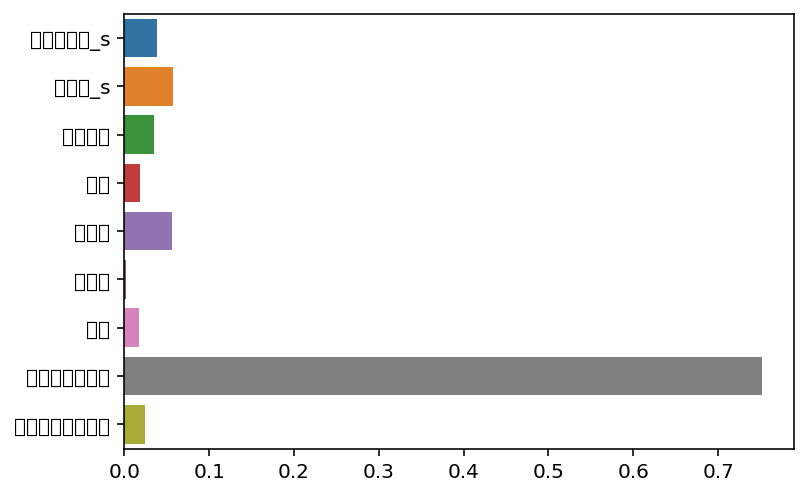

In [255]:
sns.barplot(x=rf_clf.feature_importances_,y=X_train.columns)